# Data processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_excel('translation-data.xlsx')

In [3]:
df.head()

,English,German
0,"""The mask with a grinning man's face appears c...",Die Maske mit grinsendem Männergesicht wirkt d...
1,The WSWS posted this comment on the slanderous...,Die WSWS hatte den folgenden Kommentar zu dies...
2,The Haitian manner of spelling 'vodou' was int...,"""Für diese Ausstellung wurde bewusst die haiti..."
3,The database also records new manufacturers in...,Die Datenbank nimmt bei jeder neuen Herausgabe...
4,Medially this situation is hushed up with just...,"Medial wird diese Situation, wenige Ausnahmen ..."


### 1. Drop duplicates and nan

In [4]:
# drop duplicates and nan
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

### 2. Remove redundant punctuation marks

In [5]:
def clean_sent(x: str) -> str:
    
    """
    Clean the sentence, remove special character.

    Args:
        x: The sentence to be processed.

    Returns:
        The processed sentence.
    """
    
    # some sentences end with '...' or '…', first replace them with only one dot '.'
    if x.endswith(('...','…')):
        x = re.sub(r'\.{3}|…$','.',x)
        
    # check if the sentence ends with a dot '.', a question marks '?', a exclamation mark '!' or quotation marks
    # if the sentence does not end with any of them, add a dot to the end of the sentence
    if not x.endswith(('.','?','!',".'",'."')):
        x = x + '.'
        
    # replace special character at the begining or the end of the sentence
    pattern = r'^[^\w\s.?!]*|[^\w\s.?!]*$'
    x = re.sub(pattern, '', x)
    return x        

In [6]:
df['English'] = df['English'].apply(clean_sent)
df['German'] = df['German'].apply(clean_sent)

### 3. Check the length of the sentences to see if there are any outliers using histogram

In [7]:
sentence_len_eng = df.English.apply(lambda x: len(x.split()))
sentence_len_ger = df.German.apply(lambda x: len(x.split()))

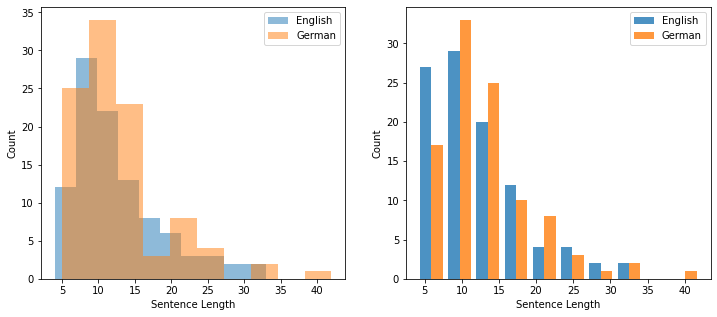

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.hist(sentence_len_eng, alpha=0.5,label='English')
ax1.hist(sentence_len_ger, alpha=0.5,label='German')
ax1.legend(loc='upper right')
ax1.set_xlabel('Sentence Length')
ax1.set_ylabel('Count')

ax2.hist([sentence_len_eng,sentence_len_ger], alpha=0.8, label=['English','German'])
ax2.legend(loc='upper right')
ax2.set_xlabel('Sentence Length')
ax2.set_ylabel('Count')

plt.show()

In [9]:
# there are no outliers in the dataset
# save processed data
df.to_csv('cleaned_dataset.csv',index=False)